In [149]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [5]:
#Declaration of Dictionary with labels corresponding to their respective Gesture
lookup = dict()
reverse_lookup = dict()
count = 0

for gesture in os.listdir(os.getcwd()+"/leapGestRecog/00"):
    reverse_lookup[int(gesture[:2])-1] = gesture
    lookup[gesture] = int(gesture[:2])-1
print("Lookup:")
print(lookup)
print("-------")
print("ReverseLookup:")
print(reverse_lookup)

Lookup:
{'05_thumb': 4, '08_palm_moved': 7, '02_l': 1, '01_palm': 0, '07_ok': 6, '10_down': 9, '06_index': 5, '09_c': 8, '03_fist': 2, '04_fist_moved': 3}
-------
ReverseLookup:
{4: '05_thumb', 7: '08_palm_moved', 1: '02_l', 0: '01_palm', 6: '07_ok', 9: '10_down', 5: '06_index', 8: '09_c', 2: '03_fist', 3: '04_fist_moved'}


In [8]:
#Assignment of X data and Y data
x_data, y_data = [], []
num_images = 0

for personNum in os.listdir(os.getcwd()+"/leapGestRecog/"):
    if not personNum.startswith('.'):
        for gesture in os.listdir(os.getcwd()+"/leapGestRecog/"+personNum+"/"):
            if not gesture.startswith('.'):
                count = 0
                for image in os.listdir(os.getcwd()+"/leapGestRecog/"+personNum+"/"+gesture+"/"):
                    img = Image.open(os.getcwd()+"/leapGestRecog/"+personNum+"/"+gesture+"/"+image).convert('L')
                    img = img.resize((320,120))
                    arr = np.array(img)
                    x_data.append(arr)
                    count += 1
                y_vals = np.full((count,1),lookup[gesture])
                y_data.append(y_vals)
                num_images += count
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(num_images,1)        

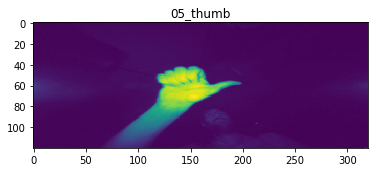

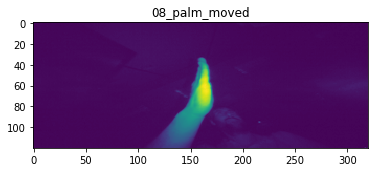

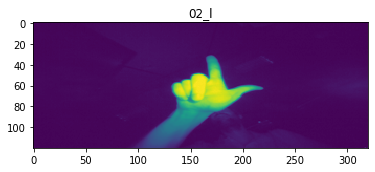

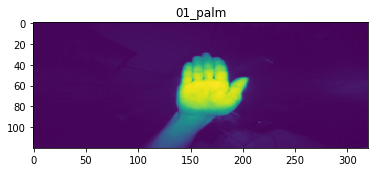

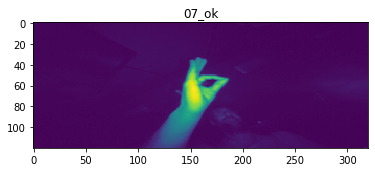

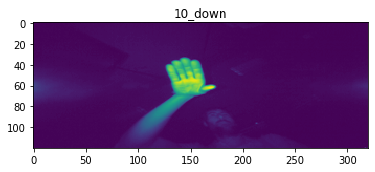

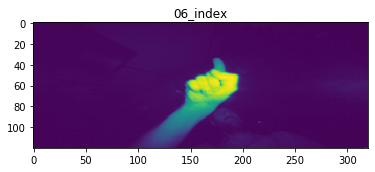

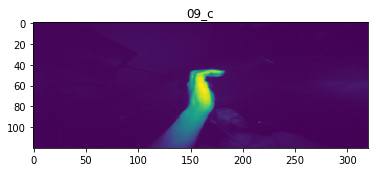

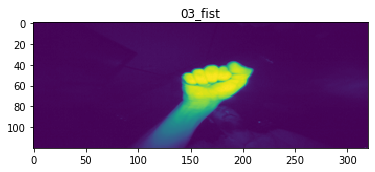

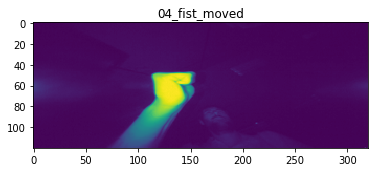

In [9]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :].reshape(120,320))
    plt.title(reverse_lookup[y_data[i*200 ,0]])
    plt.show()

In [ ]:
#Fixing up of Data
from keras.utils import to_categorical
y_data = to_categorical(y_data)

x_data = x_data.reshape((num_images,120,320,1))
x_data/=255

In [ ]:
#Seperation of Data into 3 sets, train, validation, and test
from sklearn.model_selection import train_test_split
x_train, x_split, y_train, y_split = train_test_split(x_data, y_data, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_split,y_split, test_size = 0.5)

In [ ]:
#Model Creation
from keras import models, layers
model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

In [ ]:
model.save(os.getcwd()+"/gesturesModel.h5")

In [ ]:
x_test

In [ ]:
plt.imshow(x_test[30].reshape((120,320)))
prediction = model.predict(x_test[30].reshape(1,120,320,1)).tolist()[0]
print(reverse_lookup[prediction.index(max(prediction))])
print(prediction)

(120, 320)
09_c
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


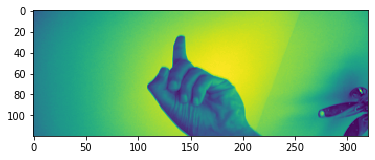

In [130]:
#testing with local images
import PIL
local = Image.open(os.getcwd()+"/local_test.jpg")
local = local.rotate(90, PIL.Image.NEAREST, expand = 1) 
local = local.resize((320,120)).convert('L')
local = np.array(local)
print(local.shape)
local = local.reshape((120,320))
plt.imshow(local)
prediction = model.predict(local.reshape(1,120,320,1)).tolist()[0]
print(reverse_lookup[prediction.index(max(prediction))])
print(max(prediction))

In [146]:
#Implementing Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
)


In [147]:
model.fit(aug.flow(x_train,y_train,batch_size=64), epochs=10, verbose=1, validation_data=(x_val, y_val))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
250/250 [==============================] - 191s 764ms/step - loss: 0.5309 - accuracy: 0.8204 - val_loss: 0.1303 - val_accuracy: 0.9620
Epoch 2/10
250/250 [==============================] - 182s 727ms/step - loss: 0.3492 - accuracy: 0.8817 - val_loss: 0.0397 - val_accuracy: 0.9850
Epoch 3/10
250/250 [==============================] - 182s 726ms/step - loss: 0.2529 - accuracy: 0.9176 - val_loss: 0.0533 - val_accuracy: 0.9780
Epoch 4/10
250/250 [==============================] - 173s 690ms/step - loss: 0.2029 - accuracy: 0.9334 - val_loss: 0.0446 - val_accuracy: 0.9850
Epoch 5/10
250/250 [==============================] - 176s 702ms/step - loss: 0.1684 - accuracy: 0.9457 - val_loss: 0.0263 - val_accuracy: 0.9905
Epoch 6/10
250/250 [==============================] - 174s 697ms/step - loss: 0.1376 - accuracy: 0.9528 - val_loss: 0.0184 - val_accuracy: 0.9935
Epoch 7/10
250/250 [==============================] - 174s 696ms/step - loss: 0.1243 - accuracy: 0.9614 - val_loss: 0.0110 -

In [148]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 6s 3ms/step
Accuracy:1.0


04_fist_moved
[4.439772055775393e-06, 2.2058971538285732e-08, 3.525345528032631e-05, 0.9997203946113586, 2.4664459488121793e-06, 2.453113268074958e-09, 7.592790751687062e-08, 4.7018207283144875e-07, 0.00022046988306101412, 1.6428059097961523e-05]


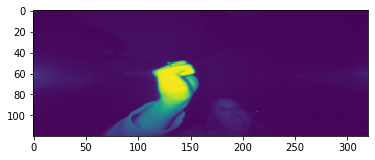

In [155]:
plt.imshow(x_test[40].reshape((120,320)))
prediction = model.predict(x_test[40].reshape(1,120,320,1)).tolist()[0]
print(reverse_lookup[prediction.index(max(prediction))])
print(prediction)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [113.  98.  77. ...  78.  78.  78.]
 [151. 146. 154. ...  79.  80.  81.]
 [145. 132. 142. ...  74.  76.  80.]]
01_palm
0.999783456325531
[0.999783456325531, 3.6335038168348877e-13, 2.0845357165118032e-14, 6.518886512192081e-22, 0.00021641769853886217, 1.397072087465541e-14, 1.1709866019333296e-20, 3.1424681468140167e-16, 4.199205646561715e-15, 1.1100547681053285e-07]


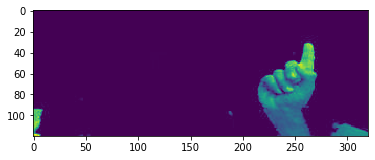

In [10]:
#testing with local images
import cv2
import os
import numpy as np
import PIL
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt
model = load_model(os.getcwd()+"/gesturesModel.h5")
local = cv2.imread(os.getcwd()+"/local_test.jpg")
local = Image.fromarray(local)
local = local.resize((320,120)).convert('L')
local = np.array(local, dtype='float32')
print(local)
local = local.reshape((120,320))
local/=225
plt.imshow(local)
prediction = model.predict(local.reshape(1,120,320,1)).tolist()[0]
print(reverse_lookup[prediction.index(max(prediction))])
print(max(prediction))
print(prediction)

In [181]:
model.save(os.getcwd()+"/gesturesModelAug.h5")

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [113.  98.  77. ...  78.  78.  78.]
 [151. 146. 154. ...  79.  80.  81.]
 [145. 132. 142. ...  74.  76.  80.]]
08_palm_moved
0.9996713399887085
[2.1981590180075727e-05, 0.00022221123799681664, 5.653712378261844e-06, 2.5692755215023233e-11, 1.039100472333132e-09, 2.380658042966388e-05, 7.283099989763286e-08, 0.9996713399887085, 1.7661623899489776e-11, 5.4970620112726465e-05]


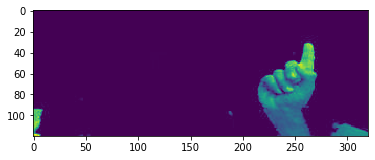

In [11]:
#testing with local images
import cv2
import os
import numpy as np
import PIL
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt
model = load_model(os.getcwd()+"/gesturesModelAug.h5")
local = cv2.imread(os.getcwd()+"/local_test.jpg")
local = Image.fromarray(local)
local = local.resize((320,120)).convert('L')
local = np.array(local, dtype='float32')
print(local)
local = local.reshape((120,320))
local/=225
plt.imshow(local)
prediction = model.predict(local.reshape(1,120,320,1)).tolist()[0]
print(reverse_lookup[prediction.index(max(prediction))])
print(max(prediction))
print(prediction)